In [1]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(tidyr)
filepath <- '/Users/cyz/survey/active_survey/'


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
cur_rank <- 4
cur_alpha <- 1
cur_completer <- 'bpmf'
cur_vmethod <- 'row-norm'

In [3]:
source('eval_util.R')

In [4]:
results <- read_results('cces16')
free_covariate_results <- read_results('cces16_free_covariates') %>% 
    mutate(strategy = paste0(selector, '-free-cov'))
results <- rbind(results, free_covariate_results) %>% filter(!(selector %in% c('sequential', 'epsilon_greedy')))

get_sample_sizes(results)

eval_method,completer,strategy,rank,v_method,optimality,alpha,n
lococv,bpmf,active,2,row-norm,A,1,1
lococv,bpmf,active,4,row-norm,A,1,1
lococv,bpmf,random,2,row-norm,A,1,1
lococv,bpmf,random,4,row-norm,A,1,1
sparsify,bpmf,active,2,row-norm,A,1,10
sparsify,bpmf,active,4,row-norm,A,1,10
sparsify,bpmf,random,2,row-norm,A,1,10
sparsify,bpmf,random,4,row-norm,A,1,10
sparsify,bpmf,active-free-cov,2,row-norm,A,1,10
sparsify,bpmf,active-free-cov,4,row-norm,A,1,10


In [5]:
strategy_colors <- c('random'='black', 'active'='red', 'random-free-cov'='steelblue', 'active-free-cov'='blueviolet')

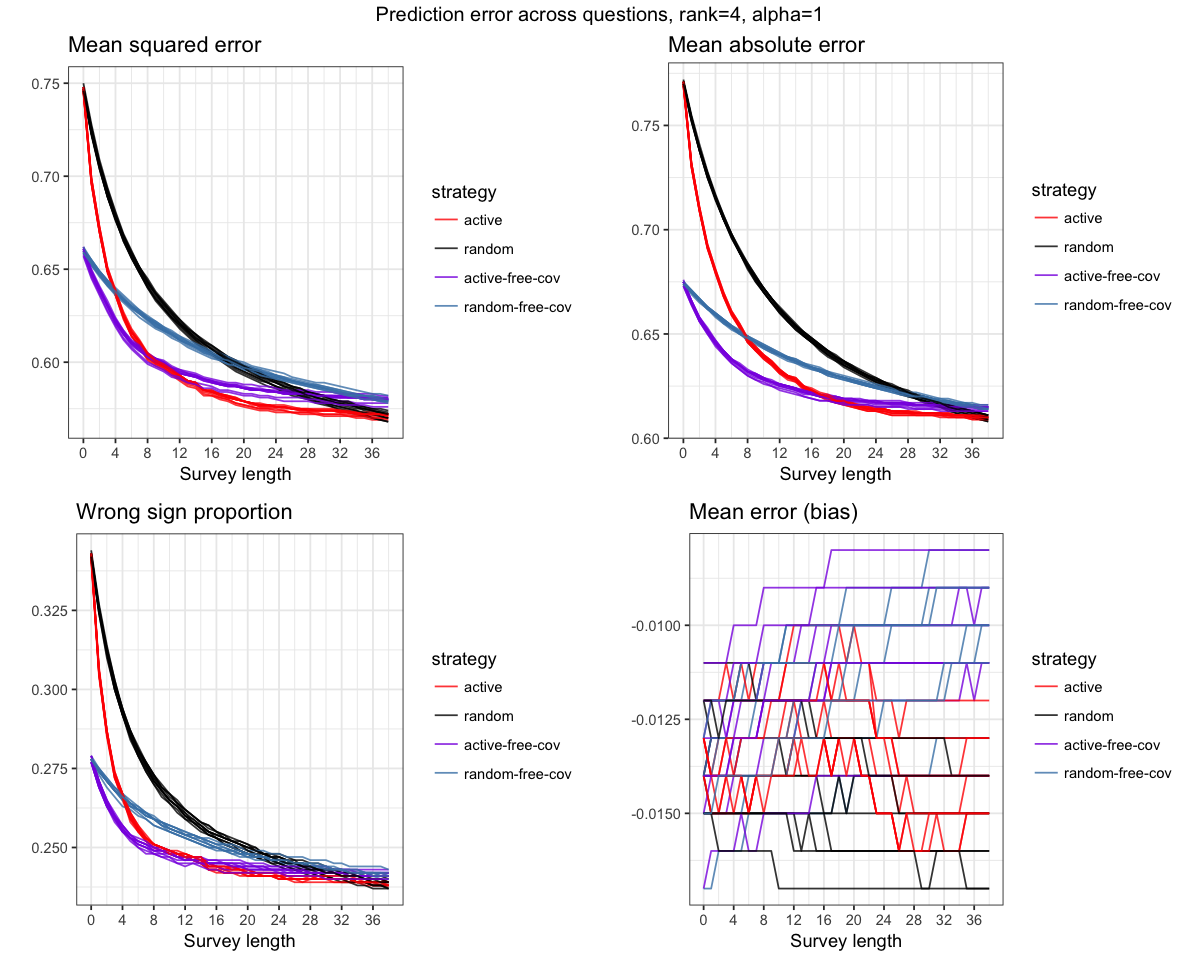

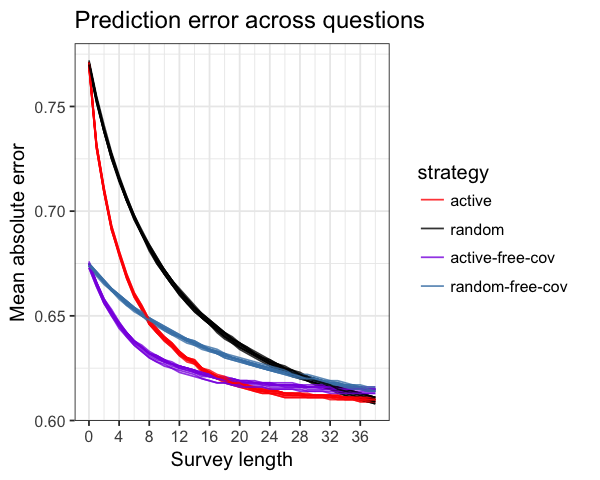

In [6]:
plot_aggregate_error(optimality_type='A')
plot_aggregate_error(optimality_type='A', metric='mae')

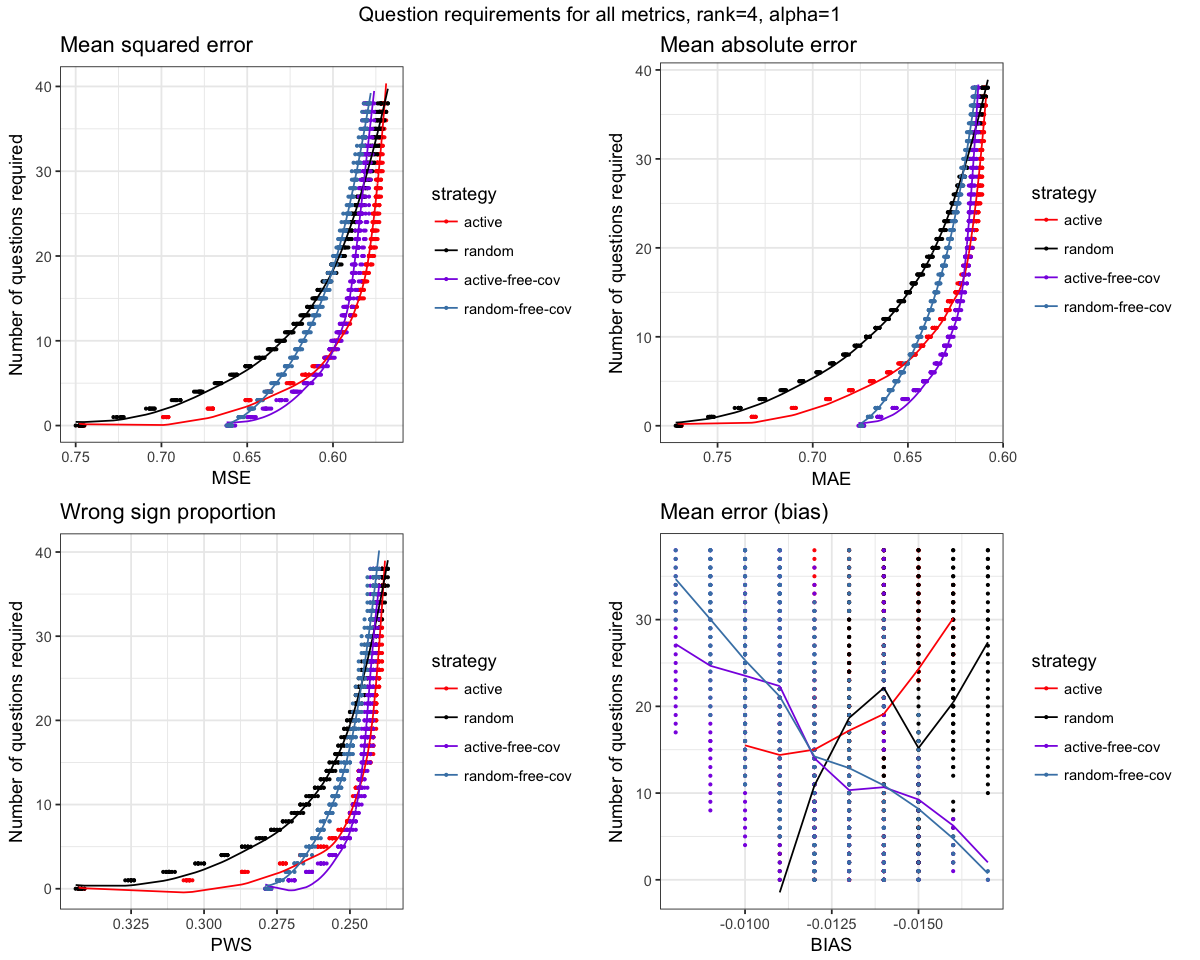

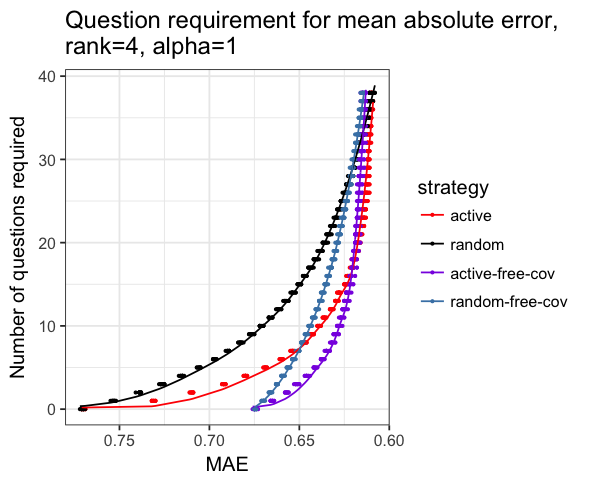

In [7]:
plot_aggregate_error_inverse(optimality_type='A')
plot_aggregate_error_inverse(optimality_type='A', metric='mae')

Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

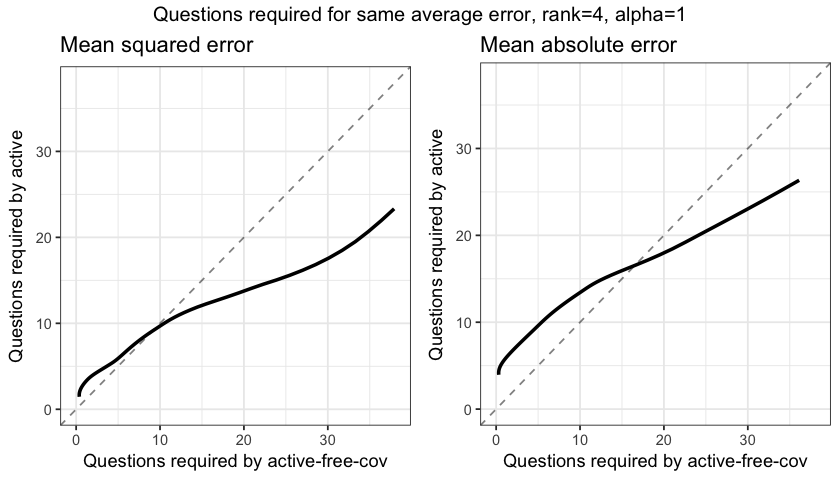

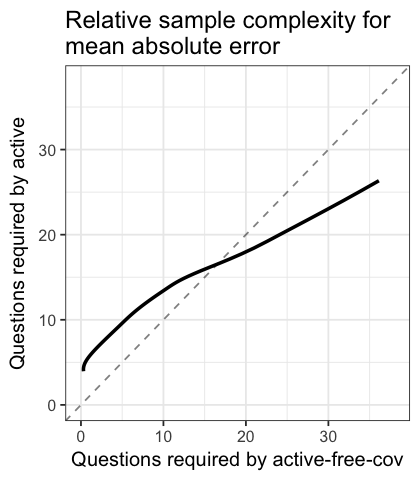

In [8]:
plot_method_comparison(optimality_type='A', base_method='active-free-cov', compare_method='active')
plot_method_comparison(optimality_type='A', base_method='active-free-cov', compare_method='active', metric='mae')

In [9]:
# plot_per_question_error(optimality_type='A')